In [23]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\jcmtz\OneDrive\Desktop\Assignment 1\titanic.csv'


print(df)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [62]:
updated_df = df.drop(columns=['deck']).dropna()

In [63]:
updated_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


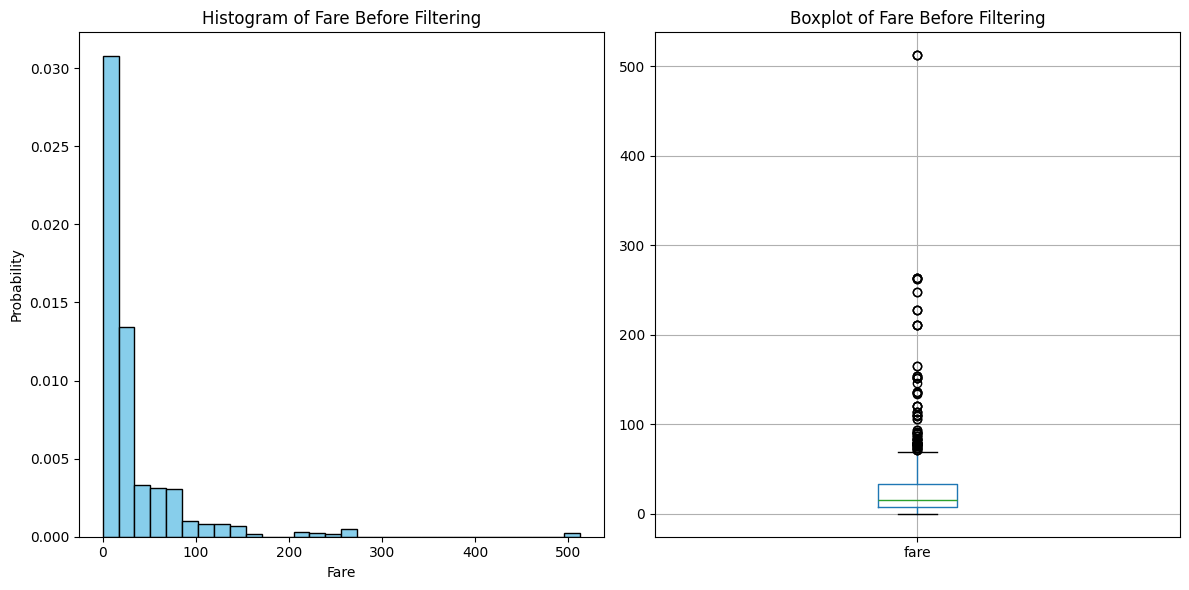

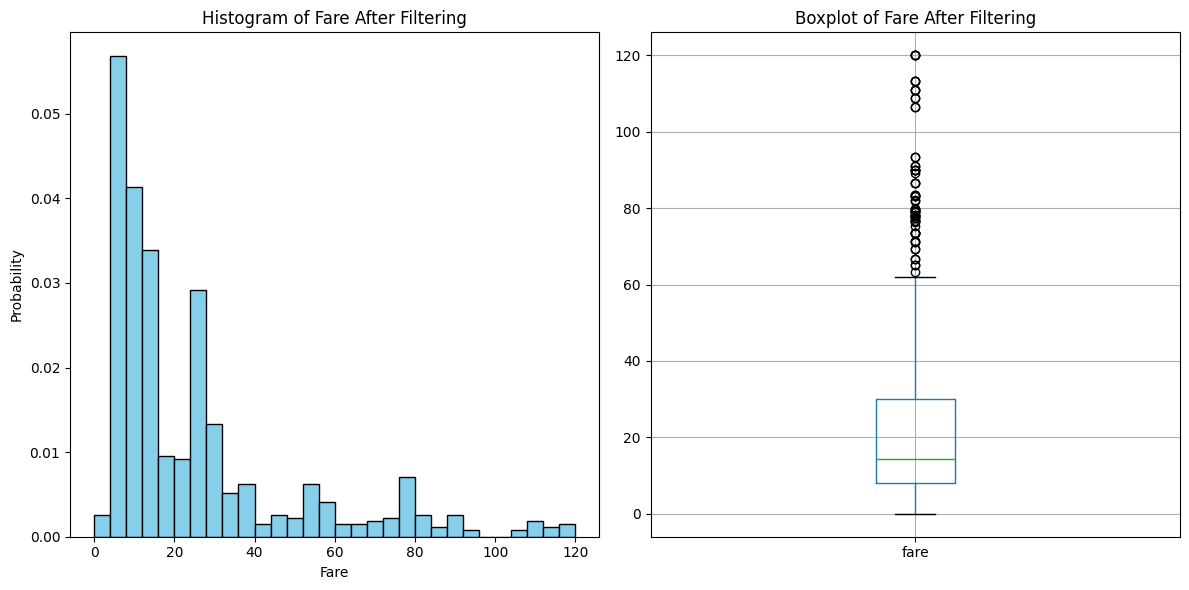

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\jcmtz\OneDrive\Desktop\Assignment 1\titanic.csv')

updated_df = df.drop(columns=['deck']).dropna()

mu = df['fare'].mean()
sigma = df['fare'].std()

filtered_df = updated_df.loc[(updated_df['fare'] >= mu - 2 * sigma) & (df['fare'] <= mu + 2 * sigma)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(updated_df['fare'], density = True, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.ylabel('Probability')
plt.xlabel('Fare')
plt.title('Histogram of Fare Before Filtering')

plt.subplot(1, 2, 2)
updated_df.boxplot(column=['fare'])
plt.title('Boxplot of Fare Before Filtering')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(filtered_df['fare'], density = True, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.ylabel('Probability')
plt.xlabel('Fare')
plt.title('Histogram of Fare After Filtering')

plt.subplot(1, 2, 2)
filtered_df.boxplot(column=['fare'])
plt.title('Boxplot of Fare After Filtering')

plt.tight_layout()
plt.show()



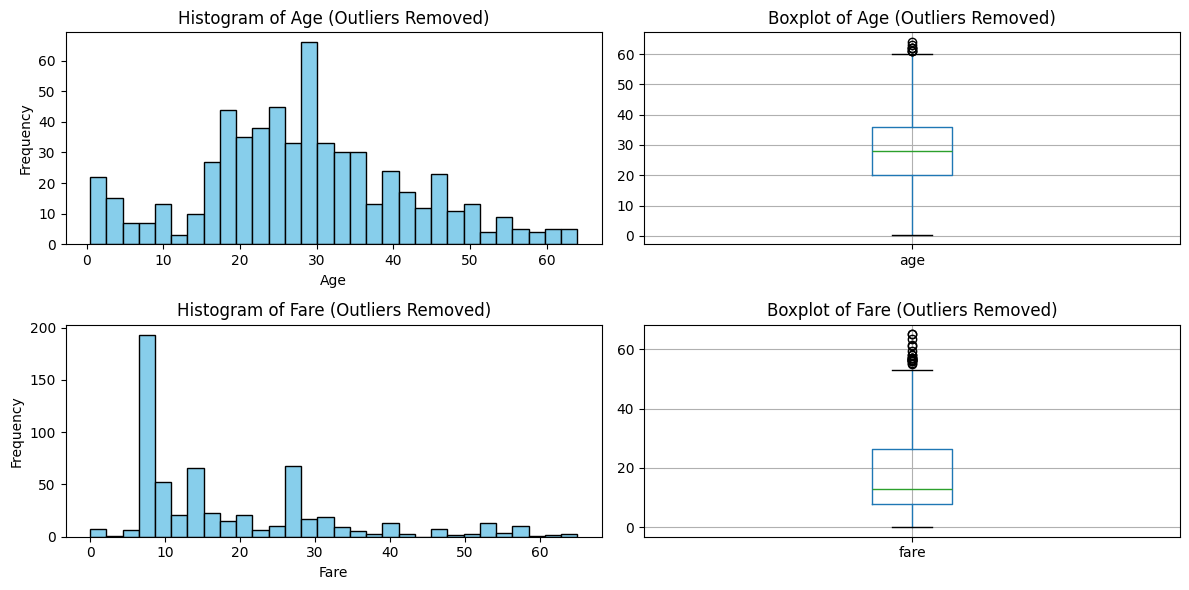

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\jcmtz\OneDrive\Desktop\Assignment 1\titanic.csv')

updated_df = df.drop(columns=['deck']).dropna()

Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
Q1_fare = df['fare'].quantile(0.25)
Q3_fare = df['fare'].quantile(0.75)

IQR_age = Q3_age - Q1_age
IQR_fare = Q3_fare - Q1_fare

age_lower_threshold = Q1_age - 1.5 * IQR_age
age_upper_threshold = Q3_age + 1.5 * IQR_age
fare_lower_threshold = Q1_fare - 1.5 * IQR_fare
fare_upper_threshold = Q3_fare + 1.5 * IQR_fare


filtered_df = updated_df.loc[((updated_df['age'] >= age_lower_threshold) & (updated_df['age'] <= age_upper_threshold)) &
                     ((updated_df['fare'] >= fare_lower_threshold) & (updated_df['fare'] <= fare_upper_threshold))]


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(filtered_df['age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (Outliers Removed)')

plt.subplot(2, 2, 2)
filtered_df.boxplot(column=['age'])
plt.title('Boxplot of Age (Outliers Removed)')

plt.subplot(2, 2, 3)
plt.hist(filtered_df['fare'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare (Outliers Removed)')

plt.subplot(2, 2, 4)
filtered_df.boxplot(column=['fare'])
plt.title('Boxplot of Fare (Outliers Removed)')

plt.tight_layout()
plt.show()
